In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
%cd /content/drive/My Drive/Colab Notebooks/DS594/

# Dataframe just holding some numerical data
df = pd.read_csv("bcan2023_custom_bq_table1.csv")

# Dataframe holding numerical and categorical property types
df_cats = pd.read_csv("bcan2023_custom_bq_table2.csv")

df22 = pd.read_csv("bcan2022_custom_bq_table3.csv")

/content/drive/My Drive/Colab Notebooks/DS594


## 2022 Data:

In [6]:
#df22.drop(columns=['ParcelAddress, ParcelAddressCity,ParcelAddressZipCode'])
df22

,BuildingAddress,BuildingAddressZipCode,SiteEUIEnergyUseIntensitykBtuft,TotalSiteEnergyUsagekBtu,EnergyStarScore,ReportedGrossFloorAreaSqFt,ReportedEnclosedParkingAreaSqFt,NaturalGasUsagekBtu,ElectricityUsagekBtu,WaterUsageIntensityGallonsft,CommunityChoiceElectricityParticipation,RenewableEnergyPurchasedthroughaPowerPurchaseAgreementPPA,RenewableEnergyCertificateRECPurchase,BackupGenerator,BatteryStorage,ElectricVehicleEVCharging,RenewableEnergyCertificateRECPurchase_1,LargestPropertyType,AllPropertyTypes
0,25 new chardon street,2114,132.2,13355487.6,30.0,101062.0,18000.0,7208906.4,6146581.5,10.04,0,0,0,1,0,0,0,Office,NaN
1,160 hancock st,2125,115.6,1272129.3,NaN,11000.0,NaN,1040689.0,231440.2,5.22,0,0,0,0,0,0,0,"Repair Services (Vehicle, Shoe, Locksmith, etc.)",NaN
2,2400 beacon street,2467,48.9,6946663.5,77.0,141940.0,NaN,3714810.4,3231853.2,26.61,0,0,0,1,0,0,0,Multifamily Housing,NaN
3,70 dunstable street,2129,57.2,2159861.1,85.0,37727.0,NaN,1313706.5,846154.5,40.42,0,0,0,0,0,0,0,Multifamily Housing,NaN
4,216 main street,2129,54.4,1125785.2,NaN,20689.0,NaN,720419.7,405365.5,48.61,0,0,0,0,0,0,0,Multifamily Housing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,37 harrison st,2131,NaN,NaN,NaN,9072.0,NaN,NaN,132279.8,NaN,0,0,0,0,0,0,0,Multifamily Housing,NaN
5037,35 harrison st,2131,NaN,NaN,NaN,9064.0,NaN,NaN,104376.5,NaN,0,0,0,0,0,0,0,Multifamily Housing,NaN
5038,218 florence st,2131,NaN,NaN,NaN,9072.0,NaN,NaN,120139.9,NaN,0,0,0,0,0,0,0,Multifamily Housing,NaN
5039,138-148 warren street,2119,111.9,2707650.7,NaN,24200.0,NaN,2440300.0,267350.7,35.25,1,0,0,0,0,0,0,Multifamily Housing,NaN


In [7]:
df22_selected = df22[['SiteEUIEnergyUseIntensitykBtuft','ReportedGrossFloorAreaSqFt','ReportedEnclosedParkingAreaSqFt','NaturalGasUsagekBtu','ElectricityUsagekBtu','WaterUsageIntensityGallonsft','CommunityChoiceElectricityParticipation','RenewableEnergyPurchasedthroughaPowerPurchaseAgreementPPA','RenewableEnergyCertificateRECPurchase','BackupGenerator','BatteryStorage','ElectricVehicleEVCharging']]

df22_selected.head()


selected_corr = df22_selected.corr()['SiteEUIEnergyUseIntensitykBtuft'].sort_values(ascending=False)

dict_select = {col:len(df22_selected[df22_selected[col] != 0][col]) for col in df22_selected.columns}
select_counts = pd.DataFrame(selected_corr)
select_counts['Counts'] = select_counts.index.map(dict_select)
#print(dict22_counts['EnergyStarScore'])
select_counts#.iloc[0:10]


,SiteEUIEnergyUseIntensitykBtuft,Counts
SiteEUIEnergyUseIntensitykBtuft,1.000000,5037
NaturalGasUsagekBtu,0.244896,5024
ElectricityUsagekBtu,0.216220,5038
ReportedEnclosedParkingAreaSqFt,0.129058,4871
RenewableEnergyPurchasedthroughaPowerPurchaseAgreementPPA,0.101086,143
RenewableEnergyCertificateRECPurchase,0.092532,79
BackupGenerator,0.064363,887
ReportedGrossFloorAreaSqFt,0.056619,4934
WaterUsageIntensityGallonsft,0.037178,5023
BatteryStorage,0.016647,35


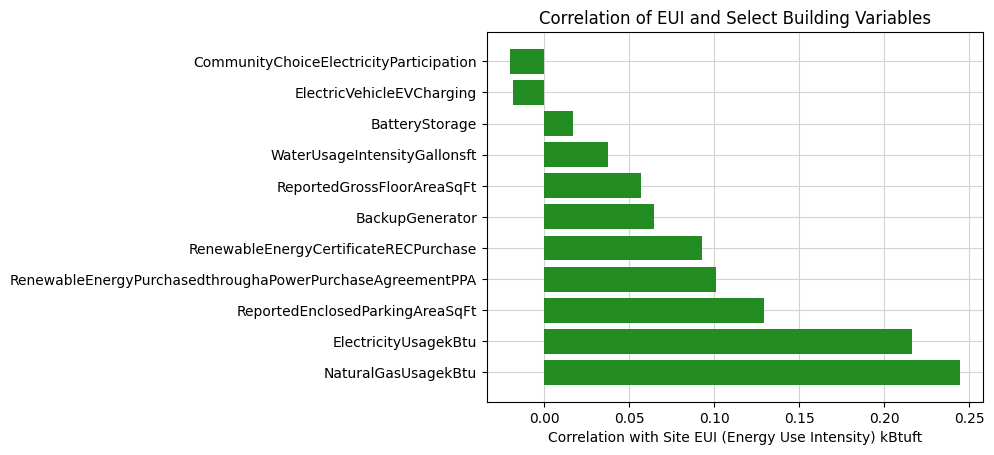

In [23]:
temp_df = select_counts.drop('SiteEUIEnergyUseIntensitykBtuft')
plt.grid(color='lightgray', zorder=0)
plt.barh(temp_df.index, temp_df['SiteEUIEnergyUseIntensitykBtuft'], color='forestgreen', zorder=3)
plt.xlabel('Correlation with Site EUI (Energy Use Intensity) kBtuft')
plt.title('Correlation of EUI and Select Building Variables')
plt.show()

In [18]:
df22_properties = df22[['SiteEUIEnergyUseIntensitykBtuft', 'TotalSiteEnergyUsagekBtu']]
df22_dummies = pd.get_dummies(df22['LargestPropertyType'], prefix='PropType', dtype=float)
df22_all = df22.join(df22_dummies)
df22_properties = df22_properties.join(df22_dummies)
df22_all.drop(['BuildingAddress','BuildingAddressZipCode', 'LargestPropertyType','AllPropertyTypes', 'RenewableEnergyCertificateRECPurchase_1'], axis=1, inplace=True)

In [19]:
cor22_list = df22_all.corr()['SiteEUIEnergyUseIntensitykBtuft'].sort_values(ascending=False)

dict22_counts = {col:len(df22_all[df22_all[col] != 0][col]) for col in df22_all.columns}
df22_counts = pd.DataFrame(cor22_list)
df22_counts['Counts'] = df22_counts.index.map(dict22_counts)
#print(dict22_counts['EnergyStarScore'])
df22_counts.iloc[0:10]


,SiteEUIEnergyUseIntensitykBtuft,Counts
SiteEUIEnergyUseIntensitykBtuft,1.000000,5037
TotalSiteEnergyUsagekBtu,0.324688,5038
PropType_Laboratory,0.285071,56
NaturalGasUsagekBtu,0.244896,5024
ElectricityUsagekBtu,0.216220,5038
PropType_Food Service,0.193398,6
PropType_Hospital (General Medical & Surgical),0.169708,22
PropType_Urgent Care/Clinic/Other Outpatient,0.133982,15
ReportedEnclosedParkingAreaSqFt,0.129058,4871
PropType_Supermarket/Grocery Store,0.125606,17


In [21]:
# Correlation list between EUI and property types.
# TotalSiteEnergyUsagekBktu is kept to act as a base correlation (dummy)
# to allow other variables to be balanced.
cor22_list_properties = df22_properties.corr()['SiteEUIEnergyUseIntensitykBtuft'].sort_values(ascending=False)

# Count the number of non-zero entries for every variable
dict22_counts_properties = {col:len(df22_all[df22_all[col] != 0][col]) for col in df22_all.columns}
df22_counts_properties = pd.DataFrame(cor22_list_properties)
df22_counts_properties['Counts'] = df22_counts_properties.index.map(dict22_counts_properties)

# Show first 20 rows
df22_counts_properties.iloc[0:10]

,SiteEUIEnergyUseIntensitykBtuft,Counts
SiteEUIEnergyUseIntensitykBtuft,1.000000,5037
TotalSiteEnergyUsagekBtu,0.324688,5038
PropType_Laboratory,0.285071,56
PropType_Food Service,0.193398,6
PropType_Hospital (General Medical & Surgical),0.169708,22
PropType_Urgent Care/Clinic/Other Outpatient,0.133982,15
PropType_Supermarket/Grocery Store,0.125606,17
PropType_Manufacturing/Industrial Plant,0.080409,29
PropType_Fast Food Restaurant,0.070397,1
PropType_Zoo,0.060925,1


## 2023 Data

In [ ]:
# Some properties have no specified type (~3000?), fill these with a str instead of NaN (registered as a float)
df_cats['AllPropertyTypes'] = df_cats['AllPropertyTypes'].fillna('Other/NaN')

new_props = [prop_str.replace(' ', '') for prop_str in df_cats['AllPropertyTypes']]
#df[df['AllPropertyTypes'].apply(lambda x: isinstance(x, float))]
#new_props[0:5]
#df.iloc[1]  # in the 2nd row, there is an "etc"! Need to drop this! (see below)

df_cats['AllPropertyTypes'] = new_props

# Creating dummy variables (bool) out of all categorical types in list of property types
#pd.get_dummies(df['AllPropertyTypes'], prefix='PropType_',)
#dummy_cols = pd.get_dummies(df_cats['AllPropertyTypes'], sep=',', prefix='PropType')

dummy_cols = df_cats['AllPropertyTypes'].str.get_dummies(sep=',')
df_cats = df_cats.join(dummy_cols).drop(columns='AllPropertyTypes')



In [ ]:
# Combining all 'etc' into 'Other'
for val in range(len(df_cats)):
  if df_cats['etc'].iloc[val] == 1:
    df_cats['Other'].iloc[val] = 1

df_cats.drop(['etc'], axis=1, inplace=True)

In [ ]:
# Looking at unique parts of each column of 2022 dataset
unique = {col: df22[col].unique() for col in df22.columns}
#df22_uniq = pd.DataFrame.from_dict(unique)
#df22_unique.head()
unique

{'BERDOID': array(['106365', '107277', '106685', ..., '102602', '102594', '105584'],
       dtype=object),
 'TaxParcelID': array(['302622000', '1301627000', '2102439200', ..., '504187000',
        '1903888000', '1200183001'], dtype=object),
 'PropertyOwnerName': array(['twenty 5 new chardon st lps mass lps', '\ncity of boston',
        'watermark condo trust', ..., 'boylston street llc mass llc',
        'dale village condo tr', 's a m h corp'], dtype=object),
 'BuildingAddress': array(['25 new chardon street', '160 hancock st', '2400 beacon street',
        ..., '218 florence st', '138-148 warren street',
        '138-148 Warren Street'], dtype=object),
 'BuildingAddressCity': array(['boston', nan, 'quincy'], dtype=object),
 'BuildingAddressZipCode': array(['2114', '2125', '2467', '2129', '2130', '2108', '2135', '2210',
        '2116', '2119', '2127', '2131', '2126', '2115', '2132', '2128',
        '2122', '2118', '2124', '2136', '2110', '2121', '2215', '2109',
        '2111', '2134',

In [ ]:
df_cats.drop('BuildingAddress', axis=1, inplace=False).corr()

,ReportedGrossFloorAreaSqFt,ReportedEnclosedParkingAreaSqFt,SiteEUIEnergyUseIntensitykBtuft,EnergyStarScore,TotalSiteEnergyUsagekBtu,NaturalGasUsagekBtu,ElectricityUsagekBtu,WaterUsageIntensityGallonsft,AdultEducation,AmbulatorySurgicalCenter,...,StripMall,Supermarket/GroceryStore,UrgentCare/Clinic/OtherOutpatient,VehicleDealership,VeterinaryOffice,VocationalSchool,WastewaterTreatmentPlant,WholesaleClub/Supercenter,WorshipFacility,Zoo
ReportedGrossFloorAreaSqFt,1.000000,0.440102,0.082712,-0.013531,0.770358,0.518510,0.862400,-0.004805,-0.006832,-0.000226,...,-0.013293,-0.012947,-0.008697,-0.004930,-0.000389,-0.005766,-0.000528,-0.005330,-0.022370,-0.002959
ReportedEnclosedParkingAreaSqFt,0.440102,1.000000,0.144931,-0.014353,0.368474,0.318902,0.494597,-0.068210,NaN,0.156670,...,NaN,0.004228,0.063348,0.035042,NaN,NaN,NaN,NaN,-0.067828,NaN
SiteEUIEnergyUseIntensitykBtuft,0.082712,0.144931,1.000000,-0.591320,0.353290,0.289887,0.235186,0.009488,-0.013244,0.056649,...,0.020010,0.118667,0.233646,0.000032,-0.007252,-0.013318,NaN,-0.010687,-0.043596,0.071974
EnergyStarScore,-0.013531,-0.014353,-0.591320,1.000000,-0.136288,-0.162718,-0.103352,-0.066412,-0.005298,NaN,...,NaN,0.019548,-0.081322,NaN,-0.020311,NaN,NaN,NaN,-0.096939,NaN
TotalSiteEnergyUsagekBtu,0.770358,0.368474,0.353290,-0.136288,1.000000,0.740005,0.846920,-0.005140,-0.006843,0.039113,...,-0.009592,0.002230,0.082297,-0.004284,0.000427,-0.004679,NaN,-0.005523,-0.021312,0.007237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VocationalSchool,-0.005766,NaN,-0.013318,NaN,-0.004679,-0.004056,-0.004654,-0.000964,-0.000580,-0.000410,...,-0.001196,-0.001392,-0.001330,-0.000410,-0.000290,1.000000,-0.000290,-0.000410,-0.001906,-0.000290
WastewaterTreatmentPlant,-0.000528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000335,-0.000237,...,-0.000690,-0.000803,-0.000768,-0.000237,-0.000167,-0.000290,1.000000,-0.000237,-0.001100,-0.000167
WholesaleClub/Supercenter,-0.005330,NaN,-0.010687,NaN,-0.005523,-0.004734,-0.005923,-0.000962,-0.000473,-0.000335,...,-0.000976,-0.001136,-0.001086,-0.000335,-0.000237,-0.000410,-0.000237,1.000000,-0.001556,-0.000237
WorshipFacility,-0.022370,-0.067828,-0.043596,-0.096939,-0.021312,-0.015848,-0.028222,-0.003675,0.074349,-0.001556,...,-0.004543,-0.005287,-0.005051,-0.001556,-0.001100,-0.001906,-0.001100,-0.001556,1.000000,-0.001100


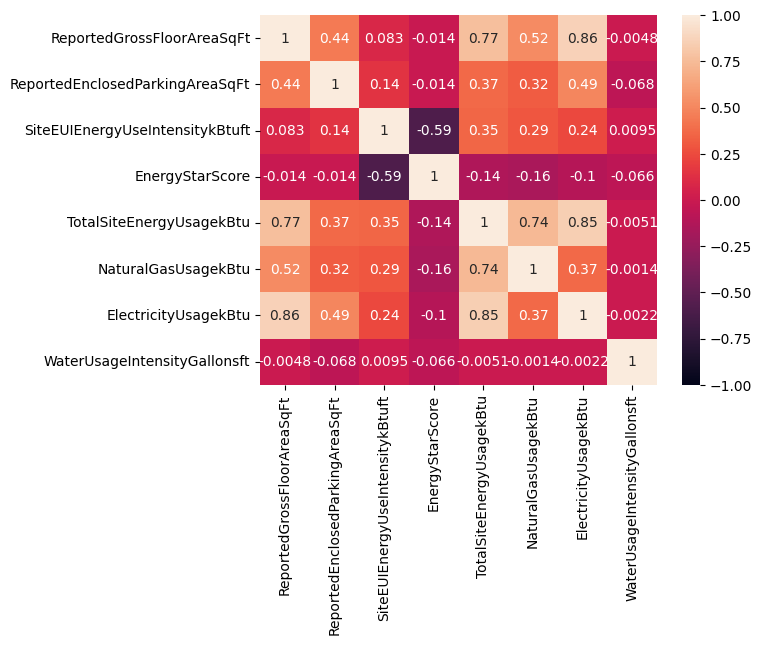

In [ ]:
sns.heatmap(df.drop('BuildingAddress', axis=1).corr(), vmin=-1, vmax=1, annot=True);

In [ ]:
cor_list = df_cats.corr()['SiteEUIEnergyUseIntensitykBtuft'].sort_values(ascending=False)

dict_counts = {col:len(df_cats[df_cats[col] != 0][col]) for col in df_cats.columns}
df_counts = pd.DataFrame(cor_list)
df_counts['Counts'] = df_counts.index.map(dict_counts)
print(dict_counts['EnergyStarScore'])
df_counts.iloc[0:20]

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(cor_list)
#    print(df_counts)

<ipython-input-98-06841d401fce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_list = df_cats.corr()['SiteEUIEnergyUseIntensitykBtuft'].sort_values(ascending=False)


5981


,SiteEUIEnergyUseIntensitykBtuft,Counts
SiteEUIEnergyUseIntensitykBtuft,1.000000,5979
TotalSiteEnergyUsagekBtu,0.353290,5978
Laboratory,0.351778,77
NaturalGasUsagekBtu,0.289887,5962
ElectricityUsagekBtu,0.235186,5978
UrgentCare/Clinic/OtherOutpatient,0.233646,21
FoodService,0.200024,13
HospitalGeneralMedical&Surgical,0.190489,19
ReportedEnclosedParkingAreaSqFt,0.144931,5981
Supermarket/GroceryStore,0.118667,23


In [ ]:
#df_cats[df_cats['Laboratory'] != 0]['Laboratory']
#print(sum(df_cats['Laboratory']))


for col in df.drop('SiteEUIEnergyUseIntensitykBtuft', axis=1).columns:
  plt.plot(df['SiteEUIEnergyUseIntensitykBtuft'].to_list(), df[col].to_list())

plt.show();


In [ ]:
x = df['SiteEUIEnergyUseIntensitykBtuft']
y1 = df['NaturalGasUsagekBtu']
y2 = df['ElectricityUsagekBtu']
y3 = df['ReportedEnclosedParkingAreaSqFt']
y4 = df['ReportedGrossFloorAreaSqFt']
y5 = df['WaterUsageIntensityGallonsft']
y6 = df['TotalSiteEnergyUsagekBtu']

In [ ]:
plt.xlabel('SiteEUIEnergyUseIntensitykBtuft')
plt.scatter(x, y6)
#plt.set_xlim([xmin, xmax])
#plt.ylim([0, 7500])
#plt.ylim([0, 0.17*(10**9)])

NameError: name 'plt' is not defined